In [2]:
%pylab inline
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("http://api-twistedogic01.rhcloud.com/api/hist/0001.HK", index_col='date', parse_dates=True)
df['Log_Ret'] = np.log(df['close']/df['close'].shift(1))
df['Volatility'] = pd.rolling_std(df['Log_Ret'],window=252) * np.sqrt(252)
df['250d']=np.round(pd.rolling_mean(df['close'],window=250))
df['150d']=np.round(pd.rolling_mean(df['close'],window=150))
df['50d']=np.round(pd.rolling_mean(df['close'],window=50))
df['20d']=np.round(pd.rolling_mean(df['close'],window=20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a7e4bbed0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f5a7e554a50>], dtype=object)

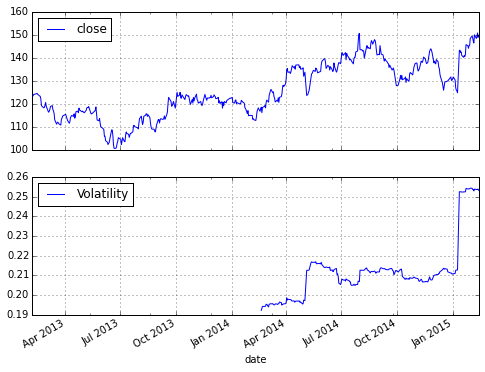

In [7]:
df[['close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))

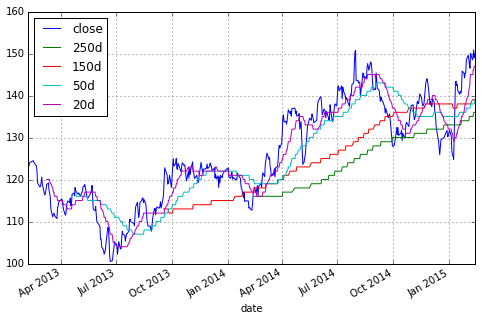

In [4]:
df[['close','250d','150d','50d','20d']].plot(grid=True,figsize=(8,5))

In [11]:
df['50-250'] = df['50d'] - df['250d']
SD = 10
df['Regime'] = np.where(df['50-250'] > SD, 1, 0)
df['Regime'] = np.where(df['50-250'] < SD, -1, df['Regime'])
df['Regime'].value_counts()

 0    257
-1    139
 1    104
dtype: int64

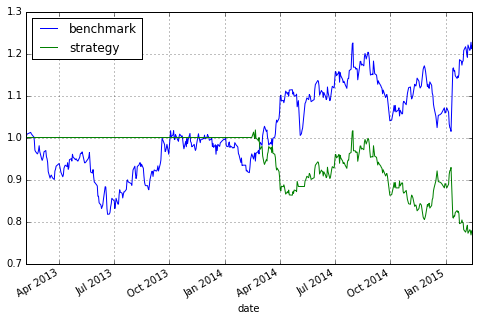

In [12]:
df['benchmark'] = np.log(df['close']/df['close'].shift(1))
df['strategy'] = df['Regime'].shift(1)* df['benchmark']
df[['benchmark', 'strategy']].cumsum().apply(np.exp).plot(grid=True,figsize=(8, 5))